<a href="https://colab.research.google.com/github/nitheesh1904/Text-recognition-in-images-using-easyOCR/blob/main/Text_recognition_from_images_using_easyOCR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing easy OCR library

In [1]:
%pip install easyocr

^C


In [6]:
import easyocr
import cv2
from matplotlib import pyplot as plt
import numpy as np
reader = easyocr.Reader(['en'])

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


Progress: |██████████████████████████████████████████████████| 100.0% Complete

# Reading An Image

In [7]:
path='D:\matlab new.jpg'

In [10]:

result = reader.readtext(path)
result

[([[167, 303], [917, 303], [917, 391], [167, 391]],
  'MathWorks | Training Services',
  0.7351412562818657),
 ([[78, 456], [872, 456], [872, 533], [78, 533]],
  'Course Completion Certificate',
  0.9999745207826237),
 ([[94, 611], [356, 611], [356, 659], [94, 659]],
  'MNITHEESHVAR',
  0.9021859919428542),
 ([[79, 685], [647, 685], [647, 750], [79, 750]],
  'has successfully completed 100%',
  0.7806030825905148),
 ([[656, 695], [1146, 695], [1146, 745], [656, 745]],
  'of the self-paced training course',
  0.8908456412456088),
 ([[80, 778], [413, 778], [413, 835], [80, 835]],
  'MATLAB Onramp',
  0.9998943601680231),
 ([[122, 964], [173, 964], [173, 991], [122, 991]], '44', 0.5795230026348145),
 ([[84, 1025], [391, 1025], [391, 1050], [84, 1050]],
  'DIRECTOR; TRAINING SERVICES',
  0.8203409546593666),
 ([[1291, 1036], [1505, 1036], [1505, 1076], [1291, 1076]],
  '07 August 2022',
  0.7104429683869169)]

# Single Text Identification

In [16]:
def singleText(path):
  reader = easyocr.Reader(['en'])
  img=plt.imread(path)
  result = reader.readtext(path)
  img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  top_left = tuple(result[0][0][0])
  bottom_right = tuple(result[0][0][2])
  text = result[0][1]
  font = cv2.FONT_HERSHEY_SIMPLEX
  cf=result[0][2]
  img = cv2.rectangle(img, top_left, bottom_right, (0, 255, 0), 3)
  img = cv2.putText(img, text, (bottom_right[0], bottom_right[1] + 20), font,0.75, (0, 0, 0), 2, cv2.LINE_AA)
  plt.imshow(img)
  return plt



Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


<module 'matplotlib.pyplot' from 'c:\\Users\\Nitheeshvar\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\matplotlib\\pyplot.py'>

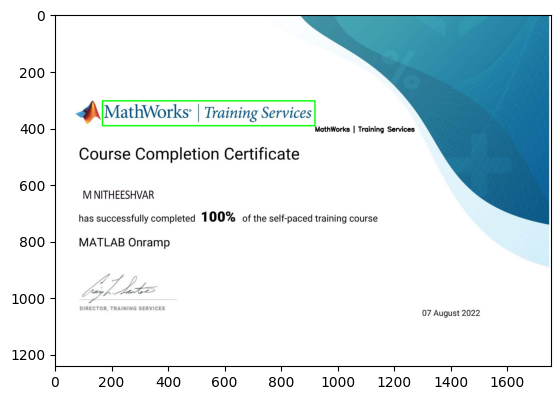

In [17]:
singleText(path)

# Highlighting all texts in case of multiple texts

In [23]:
def Multiple_text(path):
  result = reader.readtext(path)
  img=cv2.imread(path)
 
  for detection in result:
    top_left=tuple([int (val) for val in detection[0][0]])
    bottom_right=tuple([int (val) for val in detection[0][2]])
    text=detection[1]
    font=cv2.FONT_HERSHEY_SIMPLEX
    img=cv2.rectangle(img,top_left,bottom_right,(0,255,0),5)
    img=cv2.putText(img,text,top_left,font,0.75,(10,15,20),2,cv2.LINE_AA)
  img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  plt.figure(figsize=(10,10))
  plt.imshow(img_rgb)
  plt.show()
  return plt

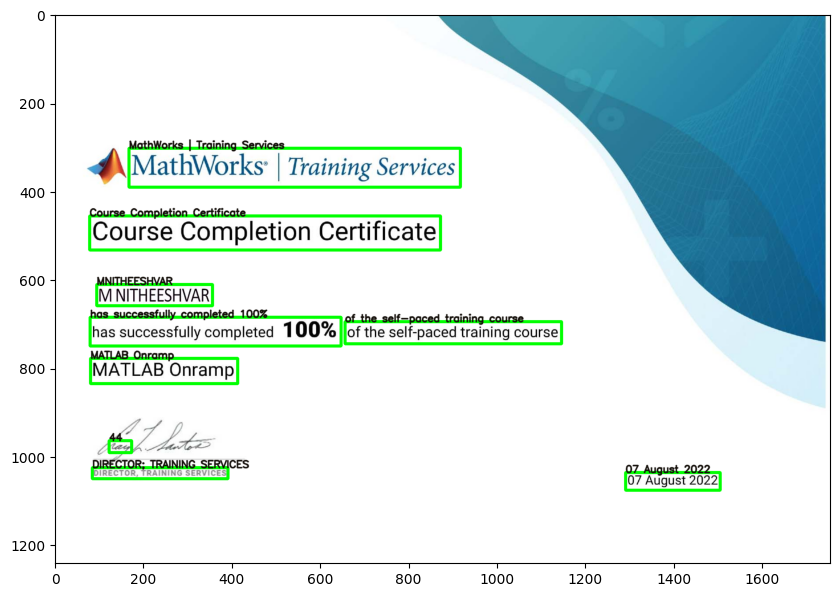

<module 'matplotlib.pyplot' from 'c:\\Users\\Nitheeshvar\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [24]:
Multiple_text(path)

# UI(Multiple Text)

In [30]:
import cv2
import matplotlib.pyplot as plt
import io

def Multiple_text_ui(img):
    reader = easyocr.Reader(['en'])
    result = reader.readtext(img)
    #img = cv2.imread(path)

    for detection in result:
        top_left = tuple([int(val) for val in detection[0][0]])
        bottom_right = tuple([int(val) for val in detection[0][2]])
        text = detection[1]
        font = cv2.FONT_HERSHEY_SIMPLEX
        img = cv2.rectangle(img, top_left, bottom_right, (0, 255, 0), 5)
        img = cv2.putText(img, text, top_left, font,0.8,(10, 15, 20), 2, cv2.LINE_AA)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    #plt.figure(figsize=(10, 10))
    #plt.imshow(img)
    return img_rgb


In [28]:
!pip install gradio

^C


In [31]:
import gradio as gr

gr.Interface(fn=Multiple_text_ui,inputs='image',outputs='image').launch(share=True)

Running on local URL:  http://127.0.0.1:7861

Could not create share link. Please check your internet connection or our status page: https://status.gradio.app


Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


# UI(Single Text)

In [ ]:
def singleText_ui(img):
  reader = easyocr.Reader(['en'])
  result = reader.readtext(img)
  img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  top_left = tuple(result[0][0][0])
  bottom_right = tuple(result[0][0][2])
  text = result[0][1]
  font = cv2.FONT_HERSHEY_SIMPLEX
  cf=result[0][2]
  img = cv2.rectangle(img, top_left, bottom_right, (0, 255, 0), 3)
  img = cv2.putText(img, text, (bottom_right[0], bottom_right[1] + 20), font, 0.5, (255, 255, 255), 2, cv2.LINE_AA)
  return img



In [ ]:
import gradio as gr

gr.Interface(fn=singleText_ui,inputs='image',outputs='image').launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://f1234a0d987d8c830e.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
